In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
print(cv2. __version__)

4.5.3


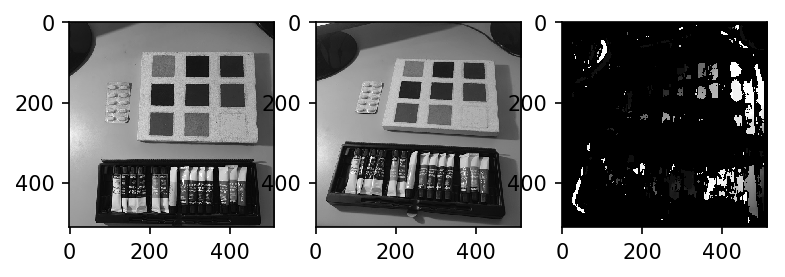

In [39]:
imgL = cv2.imread('test1.jpg', 0)
imgR = cv2.imread('test3.jpg', 0)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=21)
disparity = stereo.compute(imgL,imgR)

plt.figure(dpi = 150)
plt.subplot(131)
plt.imshow(imgL,'gray')
plt.subplot(132)
plt.imshow(imgR, 'gray')
plt.subplot(133)
plt.imshow(imgR)
plt.imshow(disparity,'gray')
plt.show()

In [2]:
imgL = cv2.imread('test1.jpg', 0)
imgR = cv2.imread('test2.jpg', 0)
imgSk = cv2.imread('test3.jpg', 0)

# imgL = cv2.imread('rene_1.jpg', 0)
# imgR = cv2.imread('rene_4.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create() 
kp = sift.detect(imgL, None)


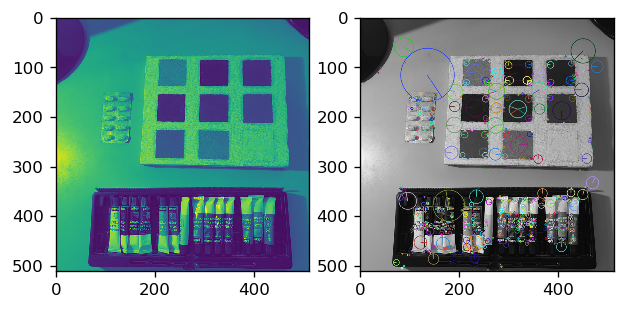

In [3]:
mg=cv2.drawKeypoints(imgL ,
                      kp ,
                      imgL ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(dpi = 120)
plt.subplot(121)
plt.imshow(imgL)
plt.subplot(122)
plt.imshow(mg)

In [4]:
keypoints_1, descriptors_1 = sift.detectAndCompute(imgL,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgSk,None)

In [5]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)

In [6]:
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(imgL, keypoints_1, imgR, keypoints_2, matches[:100], imgR, flags=2)

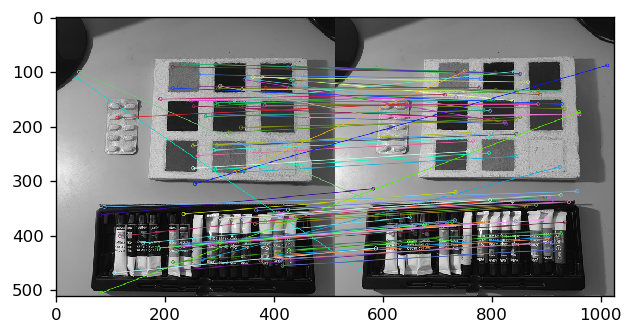

(<matplotlib.image.AxesImage at 0x47f9b132e8>, None)

In [7]:
plt.figure(dpi = 120)
# plt.subplot(121)
# plt.imshow(imgL)
# plt.subplot(122)
plt.imshow(matched_img), plt.show()

In [94]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)


flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptors_1,descriptors_2,k=2)
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(keypoints_2[m.trainIdx].pt)
        pts1.append(keypoints_1[m.queryIdx].pt)

In [97]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [107]:
mask

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [101]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

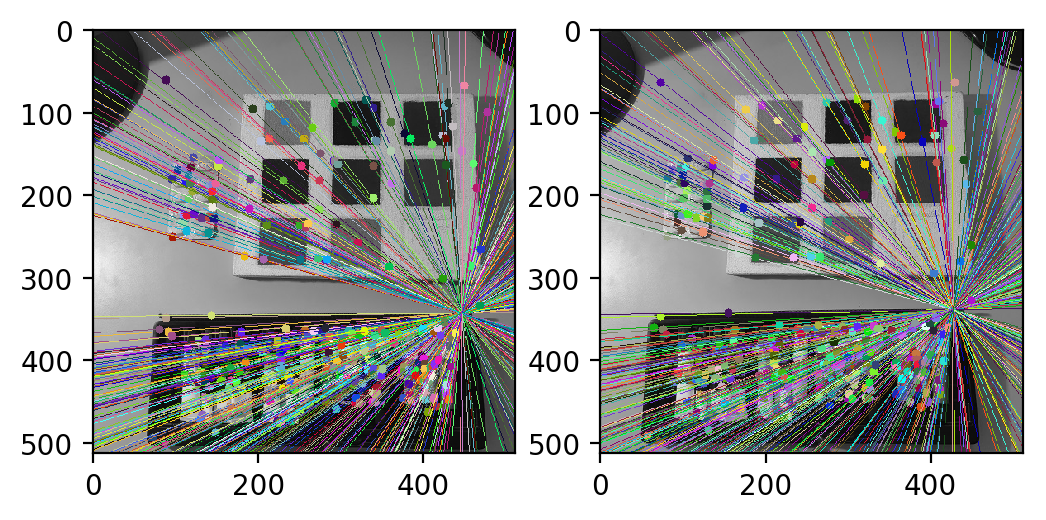

In [104]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(imgL,imgR,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(imgR,imgL,lines2,pts2,pts1)

plt.figure(dpi = 200)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

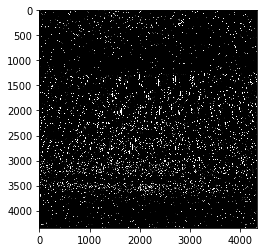

In [55]:


imgL = cv2.imread('im1.jpg', 0)
imgR = cv2.imread('im2.jpg', 0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

depth = np.ma.masked_where(disparity == -16, disparity)

In [3]:
imgL = cv2.imread('im1.jpg', 0)
imgR = cv2.imread('im2.jpg', 0)

In [3]:
surf = cv2.xfeatures2d.SURF_create(400)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-czu11tvl\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


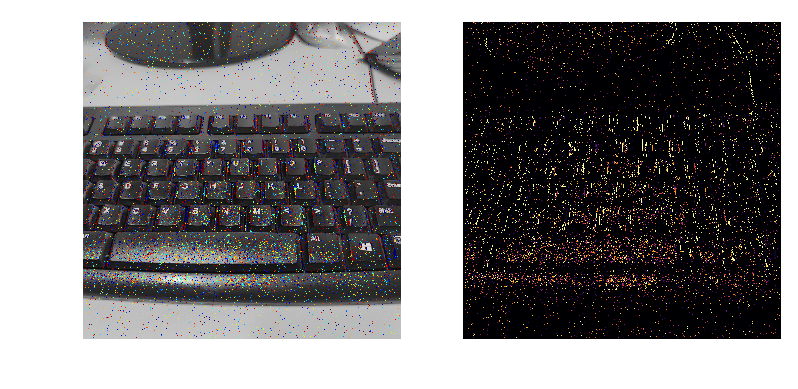

In [53]:
plt.figure(dpi = 150)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.subplot(121)
plt.imshow(imgR,'gray')
plt.axis("off")
plt.imshow(depth, 'jet')

plt.subplot(122)
plt.imshow(disparity,'inferno')
# plt.colorbar()
plt.axis("off")
plt.show()


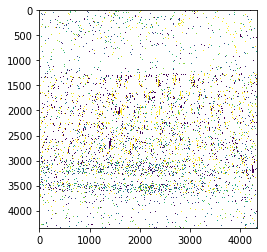